# Нейронная сеть для задачи регрессии

In [1]:
# Хотим сделать сеть, которая будет предсказывать функцию y=sin(x)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [3]:
import torch

# Train dataset

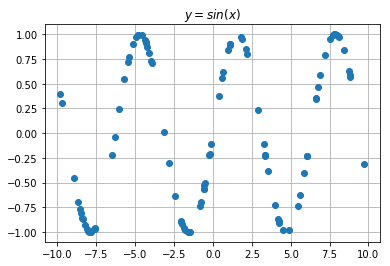

In [4]:
# Наша обучающая выборка. Мы взяли 100 случайных точек,
# умножаем их на 20 и отнимаем 10, чтобы график был выровнен по центру
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

# От всех значения берем синус
y_train = torch.sin(x_train)

# Получившийся рисунок - наша обучающая выборка. По ней нам надо восстановить всю функцию
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.grid()
plt.title('$y=sin(x)$');

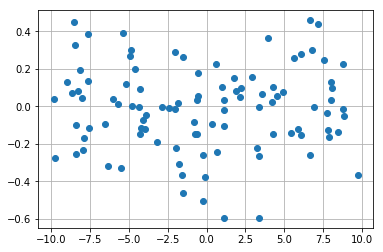

In [5]:
# Пусть имеется шум из нормального расределения, примерно такой как на картинке
noise = torch.randn(y_train.shape) / 5.

plt.grid()
plt.plot(x_train.numpy(), noise.numpy(), 'o');

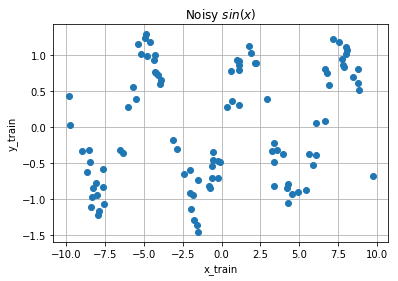

In [6]:
# Добавим шум к нашим данным
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('Noisy $sin(x)$')
plt.grid()
plt.xlabel('x_train')
plt.ylabel('y_train');

### Сможет ли нейросеть разобраться, что тут функция синус, а что - какой-то шум?

In [18]:
# Когда мы передаём в нейросеть данные - нам хочется, чтобы они были правильной размерности
x_train.unsqueeze_(1) # если есть "_" - то он трансформирует метод, к которому он применяется
y_train.unsqueeze_(1)


# Пример для методы unsqueeze
tmp = torch.Tensor([1, 2, 3])
print(tmp)
# Превращает строчку в стобец, где в каждой строчке будет одно число. 
# 1 в скобочках - это значит, что превращаем в столбец
print(tmp.unsqueeze_(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


# Validation dataset

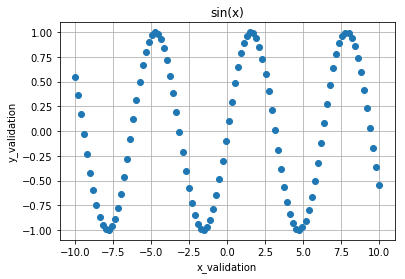

In [20]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.grid()
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [22]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model construction